# Ridge Regression

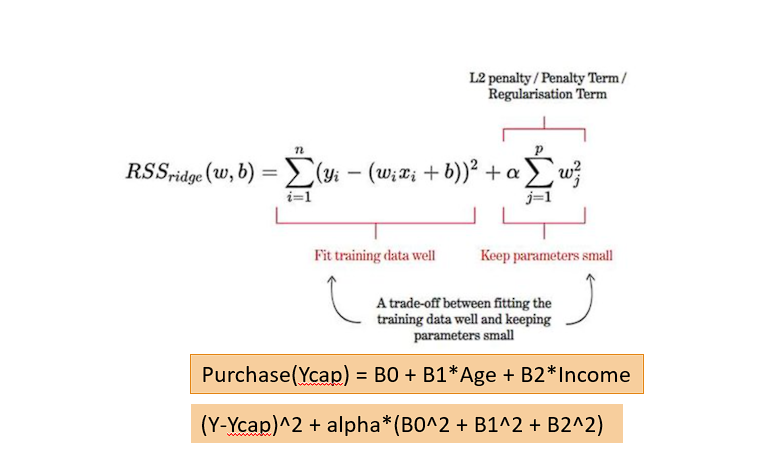

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the csv file

In [2]:
import os
os.chdir('E:/Datasets')

In [3]:
import pandas as pd
df = pd.read_csv('Cars93.csv')
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [5]:
s = df.isna().sum()
s[s>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

### Create a pipeline with all features
Weight ~ Remaning Features
1. Con - Imputer strategy mean, Standarscaler 
2. Cat - Imputer strategy most_frequent, OneHotEncoder

In [6]:
X = df.drop(labels=['id','Weight'],axis=1)
Y = df[['Weight']]

In [7]:
from PM8 import catconsep
cat, con = catconsep(X)

In [8]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [9]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [11]:
#Numeric Pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

#Categorical Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('one_hot_enc',OneHotEncoder(handle_unknown='ignore'))])

#Combine with column transformer
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [12]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[-0.48578741, -0.37572014, -0.28246529, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38801699,  1.49784409,  1.53140881, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00865782,  0.99822696,  0.94805231, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66378585,  0.39452293,  0.16416702, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53733279,  0.33207079,  0.14593713, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.88220476,  0.7484184 ,  0.60168439, ...,  0.        ,
         0.        ,  1.        ]])

In [13]:
cols = pre.get_feature_names_out()
cols

array(['num__Min.Price', 'num__Price', 'num__Max.Price', 'num__MPG.city',
       'num__MPG.highway', 'num__EngineSize', 'num__Horsepower',
       'num__RPM', 'num__Rev.per.mile', 'num__Fuel.tank.capacity',
       'num__Passengers', 'num__Length', 'num__Wheelbase', 'num__Width',
       'num__Turn.circle', 'num__Rear.seat.room', 'num__Luggage.room',
       'cat__Manufacturer_Acura', 'cat__Manufacturer_Audi',
       'cat__Manufacturer_BMW', 'cat__Manufacturer_Buick',
       'cat__Manufacturer_Cadillac', 'cat__Manufacturer_Chevrolet',
       'cat__Manufacturer_Chrylser', 'cat__Manufacturer_Chrysler',
       'cat__Manufacturer_Dodge', 'cat__Manufacturer_Eagle',
       'cat__Manufacturer_Ford', 'cat__Manufacturer_Geo',
       'cat__Manufacturer_Honda', 'cat__Manufacturer_Hyundai',
       'cat__Manufacturer_Infiniti', 'cat__Manufacturer_Lexus',
       'cat__Manufacturer_Lincoln', 'cat__Manufacturer_Mazda',
       'cat__Manufacturer_Mercedes-Benz', 'cat__Manufacturer_Mercury',
       'cat__Man

In [14]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=10)

In [16]:
xtrain.shape

(74, 257)

In [17]:
xtest.shape

(19, 257)

### Linear Regression Performance

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [20]:
model.score(xtrain,ytrain)

1.0

In [21]:
model.score(xtest,ytest)

0.8352083708149685

In [22]:
from PM8 import evaluate_model
evaluate_model(xtrain,ytrain,xtest,ytest,model)

Training Scores :
MSE :  4.650795048788433e-24
RMSE:  2.156570204929214e-12
MAE :  1.4533479524952536e-12
R2  :  1.0


Testing Scores :
MSE :  38286.84718967654
RMSE:  195.6702511616841
MAE :  148.9424157371834
R2  :  0.8352083708149685


## Create a Ridge model

In [23]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=2)
model2.fit(xtrain,ytrain)

Ridge(alpha=2)

In [24]:
model2.score(xtrain,ytrain)

0.9953183637556047

In [25]:
model2.score(xtest,ytest)

0.8656890544193266

In [26]:
evaluate_model(xtrain,ytrain,xtest,ytest,model2)

Training Scores :
MSE :  1741.170880624248
RMSE:  41.7273397261825
MAE :  31.49914976984689
R2  :  0.9953183637556047


Testing Scores :
MSE :  31205.120519648906
RMSE:  176.6497113488978
MAE :  136.57900783291362
R2  :  0.8656890544193266


### Tuning the alpha value

In [27]:
import numpy as np
alphas = np.arange(0.1,50,0.1)
print(alphas)

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2
 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6
 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.
 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4
 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8
 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2
 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6
 19.7 19

In [28]:
from sklearn.metrics import mean_squared_error
tr = []
ts = []
for i in alphas:
    model3 = Ridge(alpha=i)
    model3.fit(xtrain,ytrain)
    ypred_tr = model3.predict(xtrain)
    ypred_ts = model3.predict(xtest)
    tr_err = mean_squared_error(ytrain,ypred_tr)
    ts_err = mean_squared_error(ytest,ypred_ts)
    tr.append(tr_err)
    ts.append(ts_err)  

In [31]:
tr[0:5]

[12.117425814378286,
 44.9973477899841,
 94.31223225276487,
 156.67277505625128,
 229.40102182632592]

In [32]:
ts[0:5]

[37166.17812515359,
 36730.41161725314,
 36314.01466805893,
 35915.51413794497,
 35533.5967768084]

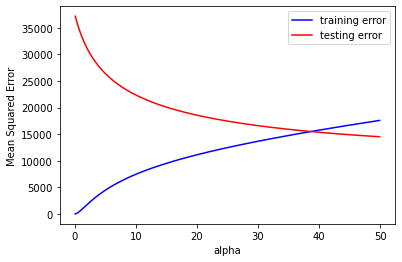

In [35]:
import matplotlib.pyplot as plt
plt.plot(alphas,tr,c='blue',label='training error')
plt.plot(alphas,ts,c='red',label='testing error')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
tr = []
ts = []
for i in alphas:
    model3 = Ridge(alpha=i)
    model3.fit(xtrain,ytrain)
    ypred_tr = model3.predict(xtrain)
    ypred_ts = model3.predict(xtest)
    tr_err = mean_squared_error(ytrain,ypred_tr)
    ts_err = mean_squared_error(ytest,ypred_ts)
    tr.append(tr_err)
    ts.append(ts_err)
    if tr_err>ts_err:
        opt_alpha = i
        print(f'Optimum Value of alpha : {i}')
        break

Optimum Value of alpha : 38.7


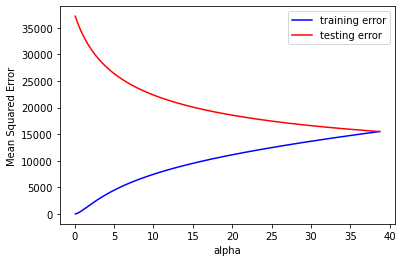

In [38]:
alph = np.arange(0.1,opt_alpha+0.1,0.1)
plt.plot(alph,tr,c='blue',label='training error')
plt.plot(alph,ts,c='red',label='testing error')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Build Final Ridge model with optimum alpha

In [39]:
model4 = Ridge(alpha=38.7)
model4.fit(xtrain,ytrain)

Ridge(alpha=38.7)

In [40]:
model4.score(xtrain,ytrain)

0.9583120020576652

In [41]:
model4.score(xtest,ytest)

0.933330655415987

In [42]:
evaluate_model(xtrain,ytrain,xtest,ytest,model4)

Training Scores :
MSE :  15504.39297278034
RMSE:  124.51663733325094
MAE :  89.61080839053723
R2  :  0.9583120020576652


Testing Scores :
MSE :  15489.615710139775
RMSE:  124.4572846808887
MAE :  103.3597793079273
R2  :  0.933330655415987


## Loss function 
1. Squared Error
2. Penalty (Square of coefficients)

In [43]:
ypred_tr = model4.predict(xtrain)

In [44]:
ypred_tr

array([[2965.49814422],
       [2531.07137051],
       [3512.32484123],
       [3562.57182215],
       [3118.55115294],
       [1730.60945631],
       [2464.08517167],
       [3673.99336301],
       [2296.18887584],
       [3210.44693871],
       [3671.046093  ],
       [2867.26805126],
       [3536.25417623],
       [2831.83484413],
       [3853.75667998],
       [2298.65468557],
       [3358.82411984],
       [3018.64436308],
       [3048.59614085],
       [2799.65256127],
       [3074.59844149],
       [2557.96370716],
       [3256.91278528],
       [2331.85913248],
       [4018.4257691 ],
       [3896.36639981],
       [3602.88759068],
       [2346.85326749],
       [4084.17748702],
       [1952.3002869 ],
       [2476.28526808],
       [3027.95337408],
       [3255.2087625 ],
       [2971.68719708],
       [3878.13146022],
       [2958.16126133],
       [2947.57155935],
       [3004.87238753],
       [2657.43947059],
       [2344.82408102],
       [3567.9755445 ],
       [3592.069

In [45]:
ytrain

,Weight
42,3040
53,2440
21,3570
6,3470
26,3080
...,...
29,3490
28,2295
64,3050
15,3715


In [49]:
ytrain['preds']=ypred_tr
ytrain

,Weight,preds
42,3040,2965.498144
53,2440,2531.071371
21,3570,3512.324841
6,3470,3562.571822
26,3080,3118.551153
...,...,...
29,3490,3534.407946
28,2295,2434.239951
64,3050,2981.486485
15,3715,3656.034291


In [51]:
ytrain['err']=ytrain['Weight']-ytrain['preds']

In [52]:
ytrain

,Weight,preds,err
42,3040,2965.498144,74.501856
53,2440,2531.071371,-91.071371
21,3570,3512.324841,57.675159
6,3470,3562.571822,-92.571822
26,3080,3118.551153,-38.551153
...,...,...,...
29,3490,3534.407946,-44.407946
28,2295,2434.239951,-139.239951
64,3050,2981.486485,68.513515
15,3715,3656.034291,58.965709


In [53]:
ytrain['sqr_err']=ytrain['err']**2

In [54]:
ytrain

,Weight,preds,err,sqr_err
42,3040,2965.498144,74.501856,5550.526514
53,2440,2531.071371,-91.071371,8293.994526
21,3570,3512.324841,57.675159,3326.423940
6,3470,3562.571822,-92.571822,8569.542256
26,3080,3118.551153,-38.551153,1486.191393
...,...,...,...,...
29,3490,3534.407946,-44.407946,1972.065658
28,2295,2434.239951,-139.239951,19387.764015
64,3050,2981.486485,68.513515,4694.101720
15,3715,3656.034291,58.965709,3476.954825


In [55]:
total_sqr_err = ytrain['sqr_err'].sum()

In [56]:
total_sqr_err

1147325.0799857453

In [64]:
model4.intercept_[0]

3099.414957651394

In [59]:
model4.coef_

array([[ 1.94831579e+01,  2.08536919e+01,  2.10424532e+01,
        -5.26673147e+01, -6.35785147e+01,  2.99964862e+01,
         5.88323953e+01, -7.10260975e+00, -2.32394440e+01,
         7.72055085e+01,  4.41930315e+01,  3.72165823e+01,
         6.97613116e+01,  5.61647398e+01,  4.07176881e+01,
         7.78561090e+00,  1.28358008e+01, -3.01279490e-02,
         4.25201709e+00,  7.26552662e+00, -5.64600407e+00,
        -3.58814680e+00, -6.84264871e+00,  0.00000000e+00,
         1.75908830e+00,  7.84787967e+00, -4.74542370e+00,
        -2.33800832e+00, -9.20140990e-01,  2.16755571e+00,
        -4.24056741e+00, -4.76118065e-01, -1.13792323e-01,
         1.54578822e+00,  1.29088382e+00, -5.20008528e+00,
        -3.63957924e-01,  3.28547894e-01,  1.20340374e+01,
        -4.44389505e+00,  0.00000000e+00, -2.62121875e+00,
        -6.43964985e+00, -1.62696918e+00,  4.55643408e-01,
         3.28157961e-01,  2.98648891e+00,  8.74883798e+00,
        -1.37369862e+00,  0.00000000e+00, -1.42628443e+0

In [62]:
sqr_coeff = 0
for i in model4.coef_.flatten():
    sqr_coeff = sqr_coeff + i**2

In [63]:
sqr_coeff

39706.467465183916

In [65]:
sqr_coeff = sqr_coeff + model4.intercept_[0]**2
sqr_coeff

9646079.547178378

In [66]:
penalty = 38.7*sqr_coeff

In [67]:
penalty

373303278.47580326

In [68]:
total_cost_function = total_sqr_err + penalty

In [69]:
total_cost_function

374450603.555789